In [ ]:
#churn nasabah bank
#Analisa ini bertujuan untuk menganalisis kumpulan data nasabah bank untuk memahami pola dan tren yang menyebabkan nasabah keluar bank
#Harapannya adalah untuk memahami apa yang membuat nasabah cenderung meninggalkan bank.

In [ ]:
#masukkan library yang dibutuhkan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
#masukkan dataset

bank_df = pd.read_csv('/content/Customer-Churn-Records.csv')
bank_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#melihat jumlah baris dan kolom
bank_df.shape

(10000, 18)

### **Data Processing**

In [ ]:
#melihat info kolom berada pada tipe data yang tepat
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
#melihat apakah ada nilai yang hilang
#bank_df.isna().sum()
bank_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
#melihat apakah data ada yang duplikasi, false tidak ada duplikasi, true ada duplikasi
bank_df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [ ]:
#menghapus kolom yang tidak diinginkan
bank_df = bank_df.drop(columns=(['RowNumber', 'CustomerId', 'Surname']))
bank_df.shape

(10000, 15)

In [ ]:
#deskripsi pada data
bank_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### **VISUALISASI**

saya ingin mengeexplore dan membuat visualisasi. Kolom utama yang ingin saya fokuskan untuk memulai adalah kolom "Exited". Kolom ini menunjukkan apakah nasabah telah meninggalkan bank atau tidak

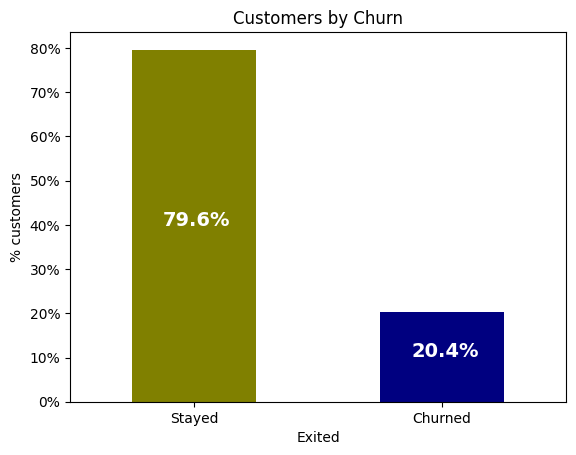

In [ ]:
#melihat berapa persen nasabah yang sudah keluar/pindah bank
colors = ["#808000", '#000080']

ax = (bank_df['Exited'].value_counts()*100/len(bank_df)).plot(kind='bar', rot = 0, color=colors, width= .5)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Customers by Churn")
ax.set_xticklabels(['Stayed', 'Churned'])
ax.set_ylabel('% customers')

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(h), (x+w/4, h/2), color = 'white', weight = 'bold', size = 14)

Dari diagram batang di atas, kita dapat melihat bahwa 20% nasabah telah keluar dari bank. Ini adalah jumlah yang cukup besar.

### **Age (Usia)**

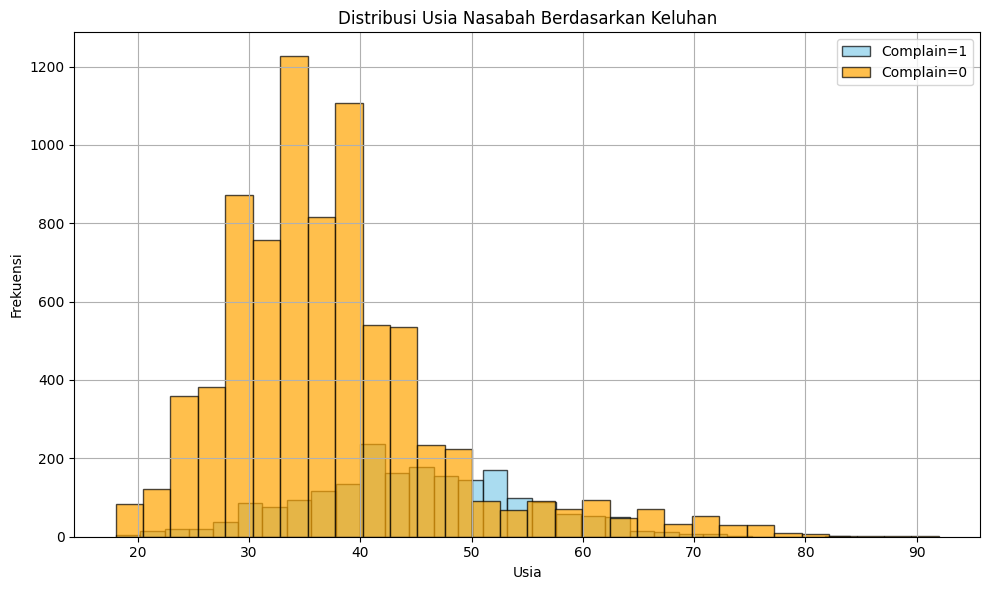

In [ ]:
#age berdasarkan complain

# Menyesuaikan ukuran plot
plt.figure(figsize=(10, 6))

# Membuat histogram usia nasabah yang mengeluh
plt.hist(bank_df[bank_df['Complain'] == 1]['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Complain=1')

# Membuat histogram usia nasabah yang tidak mengeluh
plt.hist(bank_df[bank_df['Complain'] == 0]['Age'], bins=30, color='orange', edgecolor='black', alpha=0.7, label='Complain=0')

# Menambahkan label dan judul
plt.title('Distribusi Usia Nasabah Berdasarkan Keluhan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-19-63d19fd293c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x='Exited', y='Age', palette='coolwarm')


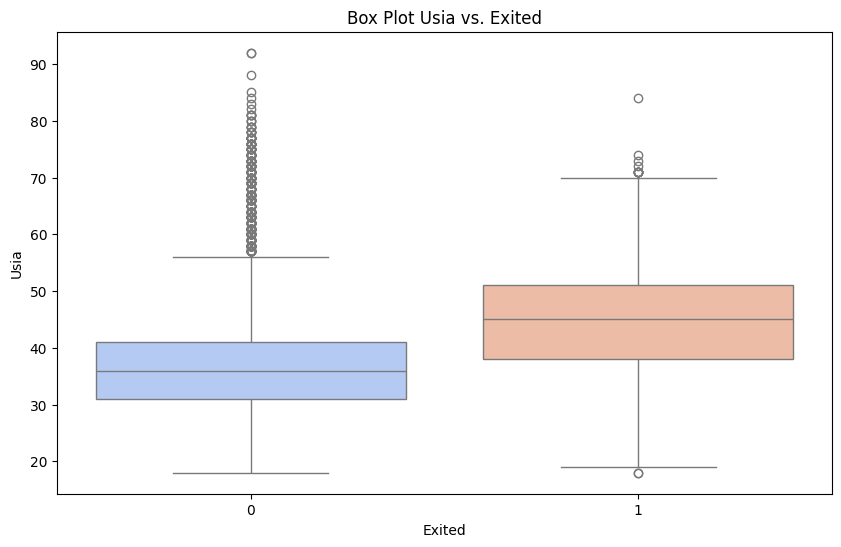

In [ ]:
# Box plot Age vs. Exited
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank_df, x='Exited', y='Age', palette='coolwarm')
plt.title('Box Plot Usia vs. Exited')
plt.xlabel('Exited')
plt.ylabel('Usia')
plt.show()

### **GENDER**

membuat visualisasi kolom gender untuk melihat apakah kita dapat menemukan insight dikolom ini

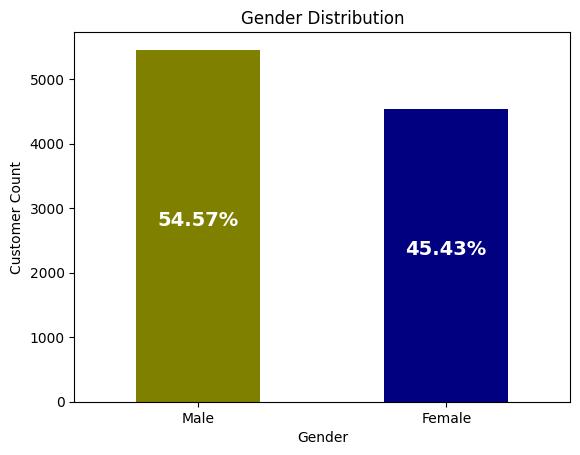

In [ ]:
#Gender distribution.

ax = bank_df['Gender'].value_counts().plot(kind='bar', rot = 0, color = colors)

ax.set_title("Gender Distribution")
ax.set_ylabel("Customer Count")
ax.set_xlabel("Gender")

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    temp = np.array((h*100/len(bank_df)))
    anot = str(temp)
    ax.annotate(anot + '%', (x+w/4-.04, h/2), color = 'white', weight = 'bold', size = 14)

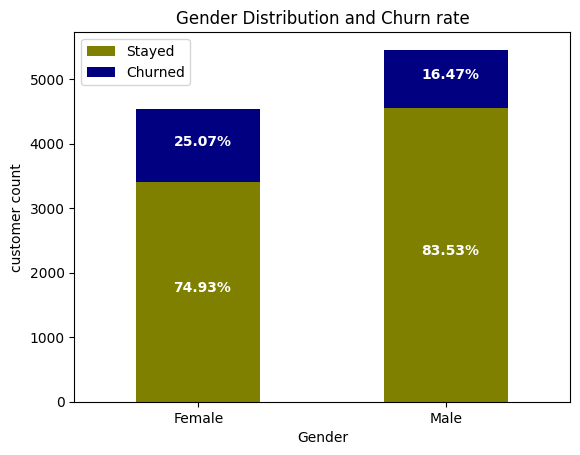

In [ ]:
gender_churn = bank_df.groupby(['Gender', 'Exited']).size().unstack()

ax = gender_churn.plot(kind='bar', stacked=True, color = colors, rot = 0)
ax.legend(labels = (['Stayed', 'Churned']))
ax.set_title('Gender Distribution and Churn rate')
ax.set_ylabel('customer count')

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    if x == -0.25:
        gender_sum = gender_churn.T.sum()[0]
    else:
        gender_sum = gender_churn.T.sum()[1]

    temp = np.array(round(h*100/gender_sum, 2))
    anot = str(temp)
    ax.annotate(anot + '%', (x+0.15, y+h/2), color = 'white', weight = 'bold', size = 10)

**TENURE**


Text(0, 0.5, 'Churn Rate')

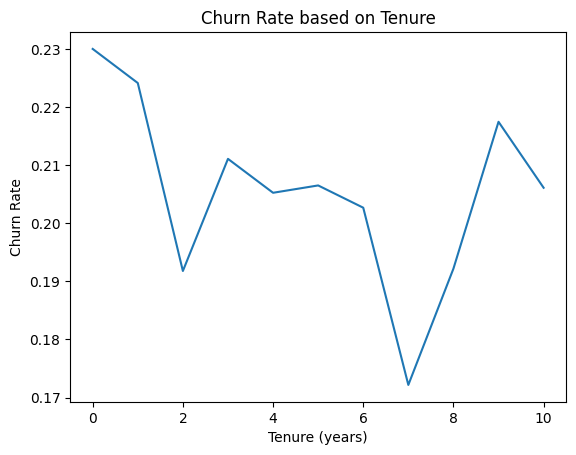

In [ ]:
#churn rate based on tenure
tenure_churn = bank_df.groupby(['Tenure', 'Exited'])['Tenure'].size().unstack()

tenure_churn['churn_rate'] = tenure_churn[1]/tenure_churn.T.sum()

ax = tenure_churn['churn_rate'].plot(kind = 'line')
ax.set_title('Churn Rate based on Tenure')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('Churn Rate')

### **SUM OF PRODUCTS**

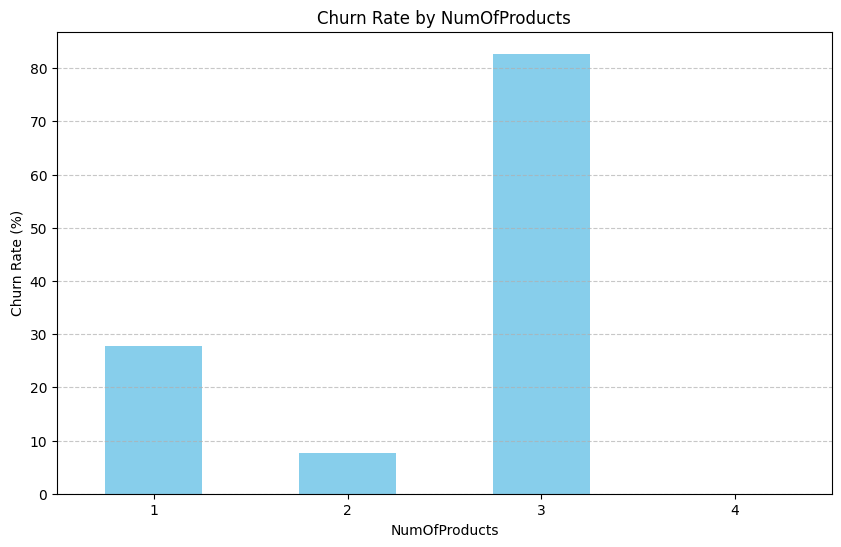

In [ ]:
# Menghitung proporsi nasabah yang keluar dan tetap bertahan untuk setiap kategori NumOfProducts
exited_counts = bank_df.groupby(['NumOfProducts', 'Exited']).size().unstack()
exited_counts['Churn Rate'] = exited_counts[1] / (exited_counts[0] + exited_counts[1]) * 100

# Membuat diagram batang
plt.figure(figsize=(10, 6))
exited_counts['Churn Rate'].plot(kind='bar', color='skyblue')
plt.title('Churn Rate by NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

dari diagram diatas terlihat churn rate yang paling tinggi adalah nasabah yang memiliki 3 produk

### **Complain**

Kolom Complain. Masuk akal jika pelanggan yang complain lebih mungkin untuk berpindah atau keluar karena mereka tidak puas dengan layanan yang mereka terima

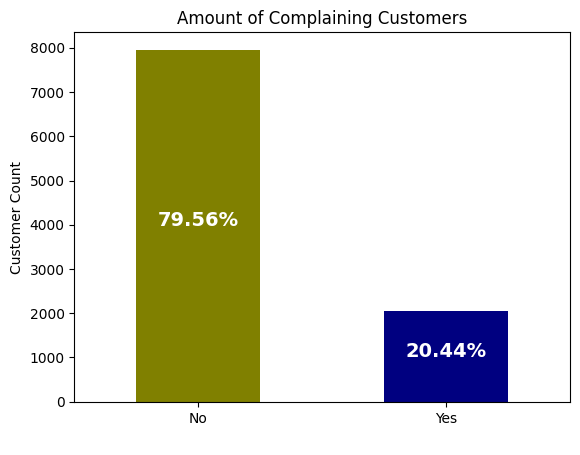

In [ ]:
#melihat berapa banyak nasabah yang complain

ax = bank_df['Complain'].value_counts().plot(kind='bar', rot = 0, color = colors)

ax.set_title("Amount of Complaining Customers")
ax.set_ylabel("Customer Count")
ax.set_xlabel(" ")
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    temp = np.array((h*100/len(bank_df)))
    anot = str(temp)
    ax.annotate(anot + '%', (x+w/4-.04, h/2), color = 'white', weight = 'bold', size = 14)

Grafik di atas menunjukkan bahwa 20% pelanggan complain, ini hampir sama dengan jumlah pelanggan yang keluar dari perusahaan.

In [ ]:
#kita lihat churn rate untuk pelanggan yang complain

complain_churn = bank_df.groupby(['Complain', 'Exited']).size().unstack()

complain_churn


Exited,0,1
Complain,,
0,7952,4
1,10,2034


Jumlah orang yang mengeluh dan tidak meninggalkan perusahaan sangat rendah sehingga sulit untuk dibuat grafiknya. Dari 2044 orang yang mengeluh, 2034 di antaranya keluar. Itu adalah tingkat churn sebesar 99%.

### Model building : Random Forest

membangun sebuah model untuk memprediksi apakah pelanggan akan berpindah atau tidak. Hal ini akan membantu mengidentifikasi fitur-fitur yang berpotensi menyebabkan pelanggan pergi. Informasi ini bisa sangat berguna untuk mencegah pelanggan meninggalkan perusahaan di masa depan.

In [ ]:
# Model building: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# one hot encoding
bank_dummies = pd.get_dummies(bank_df)

y = bank_dummies['Exited'].values
X = bank_dummies.drop(columns=['Exited'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=77, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

preds = model_rf.predict(X_test)

In [ ]:
# Menampilkan jumlah sampel dalam data pelatihan dan pengujian
print("Jumlah sampel dalam data pelatihan:", X_train.shape[0])
print("Jumlah sampel dalam data pengujian:", X_test.shape[0])

Jumlah sampel dalam data pelatihan: 8000
Jumlah sampel dalam data pengujian: 2000


In [ ]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, preds)

# Menampilkan confusion matrix dalam bentuk tabel
confusion_matrix_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(confusion_matrix_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                1606                   1
Actual Positive                   1                 392


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, preds)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, preds)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, preds)
print("F1-Score:", f1)

Accuracy: 0.999
Precision: 0.9974554707379135
Recall: 0.9974554707379135
F1-Score: 0.9974554707379135


Complain         0.778103
Age              0.087372
NumOfProducts    0.064029
dtype: float64


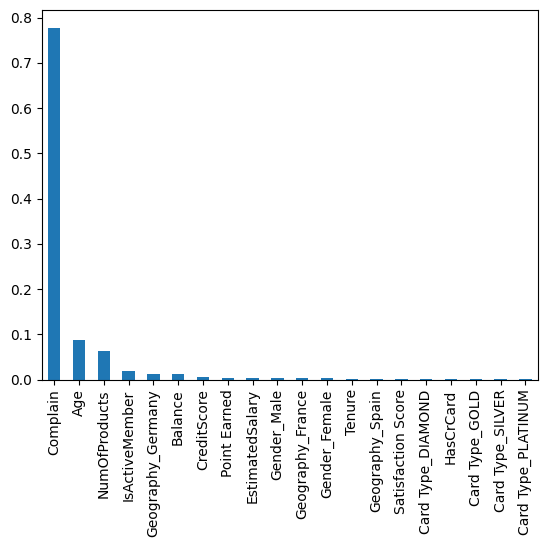

In [ ]:
forest_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
forest_importances.plot(kind='bar')

# Mengambil 3 nilai-nilai fitur penting teratas / semakin tinggi nilai semakin penting fitur tersebut
top_features = forest_importances.head(3)
print(top_features)

Seperti yang dapat kita lihat dari kepentingan fitur di atas, complain adalah fitur yang paling penting dari grafik. Saya ingin menghapus fitur ini untuk melihat bagaimana kinerja model jika tidak menggunakan kolom complain.

In [ ]:
y = bank_dummies['Exited'].values
X = bank_dummies.drop(columns = ['Exited', 'Complain'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=1000, oob_score= True, random_state=77, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

preds = model_rf.predict(X_test)

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, preds)

# Menampilkan confusion matrix dalam bentuk tabel
confusion_matrix_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(confusion_matrix_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                1584                  23
Actual Positive                 279                 114


In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, preds)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, preds)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, preds)
print("F1-Score:", f1)

Accuracy: 0.849
Precision: 0.8321167883211679
Recall: 0.2900763358778626
F1-Score: 0.43018867924528303


<Axes: >

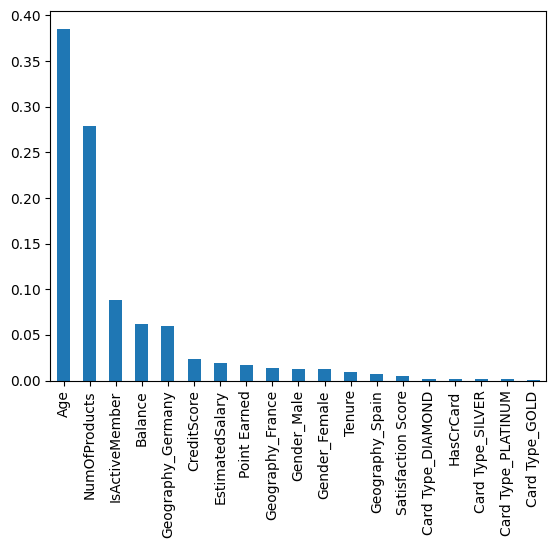

In [ ]:
forest_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

forest_importances.plot(kind='bar')

Menghapus kolom complain dari kumpulan data akan menurunkan akurasi model dari 99% menjadi 85%. Hal ini memungkinkan kita untuk melihat pentingnya kolom-kolom lain dalam kumpulan data. Yang paling penting selain (kolom complain) adalah kolom Age. Hal ini masuk akal karena beberapa pelanggan yang lebih tua mungkin meninggal atau tidak membutuhkan rekening bank di usia tua mereka.
